In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy import stats
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
# https://stackoverflow.com/a/37347783/7060068
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [2]:
# Let’s change the default plot size so we have a better view of our line plots:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

## 20 tasks in each episode and 5 actions for each edge node

In [3]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_5-actions_env-3_cooperative_first-price'
dir_list = os.listdir(path)
# print(dir_list)

In [12]:
# read results in .json files
import json

hyperparamter_string = '2021-11-10'

df_results = pd.DataFrame()
results = []
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean']]
print(len(df_results))
df_results.head(10)

446


,Social Welfare (Online Myopic)_mean,Social Welfare_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean
3120,4490.080216,2492.130119,2512.192597,1503.427272
6240,4519.639207,2481.555487,2554.159217,1521.895477
9360,4515.403279,2492.259172,2499.653511,1507.604310
12480,4439.243042,2395.351879,2433.265943,1442.445659
15600,4478.294571,2438.963775,2488.701492,1494.118954
18720,4481.217472,2448.086244,2478.998181,1493.981938
21840,4496.151846,2477.177666,2498.145601,1517.241779
24960,4457.349606,2423.795030,2457.074439,1469.398018
28080,4459.663783,2465.334807,2537.716234,1496.689345
31200,4472.131529,2551.923185,2484.258570,1476.786921


In [5]:
# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

In [6]:
# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare_mean": "MARL",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero"}, errors='raise')

In [7]:
df_results_reset.head()

,timesteps,Online Myopic,MARL,Random Allocation,All Bidding Zero
0,3120,4490.080216,2492.130119,2512.192597,1503.427272
1,6240,4519.639207,2481.555487,2554.159217,1521.895477
2,9360,4515.403279,2492.259172,2499.653511,1507.604310
3,12480,4439.243042,2395.351879,2433.265943,1442.445659
4,15600,4478.294571,2438.963775,2488.701492,1494.118954


In [8]:
# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

In [9]:
df_results_preproc.head()

,timesteps,algorithms,mean social welfare
0,3120,Online Myopic,4490.080216
1,6240,Online Myopic,4519.639207
2,9360,Online Myopic,4515.403279
3,12480,Online Myopic,4439.243042
4,15600,Online Myopic,4478.294571


(0.0, 4708.998111837985)

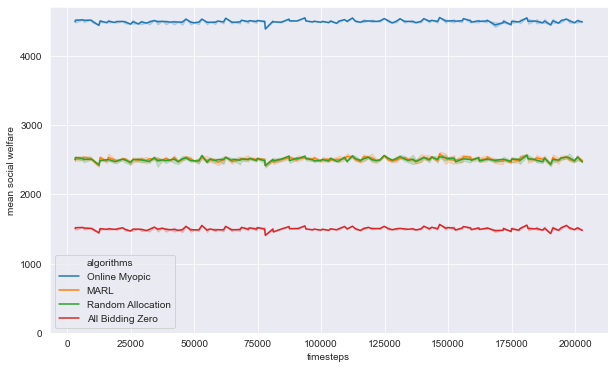

In [10]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [11]:
1/0

ZeroDivisionError: division by zero

## 20 tasks in each episode and 5 actions for each edge node (non-cooperative)

In [21]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_5-actions_env-3_non-cooperative_first-price'
dir_list = os.listdir(path)
# print(dir_list)

In [22]:
# read results in .json files
import json

hyperparamter_string = '2021-11-10'

df_results = pd.DataFrame()
results = []
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean']]
print(len(df_results))
df_results.head(10)

260


,Social Welfare (Online Myopic)_mean,Social Welfare_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean
3120,4529.329730,2560.824280,2544.343938,1543.058509
6240,4453.204040,2576.373245,2493.210798,1456.797253
9360,4458.777458,2546.899093,2467.262371,1465.138843
12480,4526.769986,2683.077865,2535.943323,1515.396656
15600,4557.889418,2810.795602,2553.240624,1576.170894
18720,4530.358155,2852.897310,2526.736767,1529.697369
21840,4534.476117,2875.692908,2521.991510,1525.075576
24960,4524.568317,2914.769226,2518.206657,1526.497588
28080,4529.231543,2931.380107,2513.708607,1538.016105
31200,4497.570279,2981.047025,2470.544705,1499.527692


In [23]:
# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

In [24]:
# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare_mean": "MARL",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero"}, errors='raise')

In [25]:
df_results_reset.head()

,timesteps,Online Myopic,MARL,Random Allocation,All Bidding Zero
0,3120,4529.329730,2560.824280,2544.343938,1543.058509
1,6240,4453.204040,2576.373245,2493.210798,1456.797253
2,9360,4458.777458,2546.899093,2467.262371,1465.138843
3,12480,4526.769986,2683.077865,2535.943323,1515.396656
4,15600,4557.889418,2810.795602,2553.240624,1576.170894


In [26]:
# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

In [27]:
df_results_preproc.head()

,timesteps,algorithms,mean social welfare
0,3120,Online Myopic,4529.329730
1,6240,Online Myopic,4453.204040
2,9360,Online Myopic,4458.777458
3,12480,Online Myopic,4526.769986
4,15600,Online Myopic,4557.889418


(0.0, 4728.644798260769)

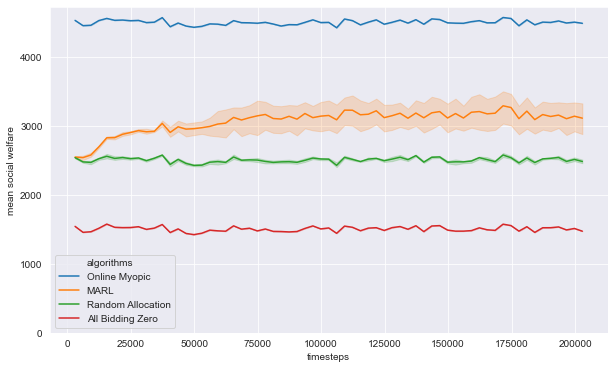

In [28]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [29]:
1/0

ZeroDivisionError: division by zero

### Online Myopic

In [ ]:
# plot the confidence interval for the mean
# https://stackoverflow.com/a/44941463/7060068

p = sns.lineplot(x=df_results.index, y='Social Welfare (Online Myopic)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
# https://stackoverflow.com/a/57101557/7060068
p.axes.set_ylim(0)

### All Bidding Zero

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare (All Bidding Zero)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

### MARL

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

### Random Allocation

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare (Random Allocation)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

In [ ]:
1/0

## Use data from the progress.csv file.

In [ ]:
# load from file
# https://thispointer.com/python-three-ways-to-check-if-a-file-is-empty/
# concatenating df1 and df2 along rows
# vertical_concat = pd.concat([df1, df2], axis=0)
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

In [ ]:
print(len(df_results))
df_results.head()

In [ ]:
df_results1 = df_results

In [ ]:
path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_2_actions'
dir_list = os.listdir(path)
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

In [ ]:
# plot the confidence interval for the mean
# dont't have customised measurements in the progress.csv file, maybe we need to get data from the *.json file.
sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results)  # 2 actions (blue)
# sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results1)  # 5 actions (yellow)

In [ ]:
# test if some file is missing
oo = {}
NoT = 40 # number of tasks in the whole time period
NoS = 60 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(30,NoS):
            f = open('simulation_results_ILP\\s2(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
           
            f.close()

In [ ]:
# print the value of the file
NoT = 20 # number of tasks in the whole time period
NoS = 23 # number of samples
F = 8.0
k = 0.35


f = open('simulation_results_ILP\\fog(tm)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
csv_f = csv.reader(f)
for row in csv_f:
    print(float(row[0]))
f.close()

In [ ]:
# get the data
oo = {}
NoT = 20 # number of tasks in the whole time period
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP\\oo(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                oo['sw', NoT, k, F, i] = float(row[0])
            f.close()

# s2 = {}
# NoT = 20
# NoS = 100 # number of samples
# for F in [8.0]:
#     for k in [0.35, 0.4, 0.45]:
#         for i in range(1,NoS+1):
#             f = open('simulation_results_ILP\s2(sw)'
#                                                  +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
#             csv_f = csv.reader(f)
#             for row in csv_f:
#                 s2['sw', NoT, k, F, i] = float(row[0])
#             f.close()

og = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/og(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                og['sw', NoT, k, F, i] = float(row[0])
            f.close()
            
fog = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/fog(sw)' 
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                fog['sw', NoT, k, F, i] = float(row[0])
            f.close()

In [ ]:
# whe F = 8 construct a dataframe
d = {}
F = 8.0
NoT = 20

for k in [0.35, 0.4, 0.45]:
    d[k] = [oo['sw', NoT, k, F, i] for i in range(10)]
result_oo = pd.DataFrame(data=d)
# print(result_oo)
# for k in [0.35, 0.4, 0.45]:
#     d[k] = [s2['sw', NoT, k, F, i] for i in range(10)]
# result_s2 = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [og['sw', NoT, k, F, i] for i in range(10)]
result_og = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [fog['sw', NoT, k, F, i] for i in range(10)]
result_fog = pd.DataFrame(data=d)

In [ ]:
result_oo.head()
result_fog.head()

In [ ]:
mean_oo = result_oo.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_oo = result_oo.std(axis = 0)  

mean_og = result_og.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_og = result_og.std(axis = 0)  

mean_fog = result_fog.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_fog = result_fog.std(axis = 0)  

In [ ]:
stats.t.ppf(1-0.025, NoS -1)

In [ ]:
# Degrees of Freedom = n – 1, 
plt.errorbar(mean_oo.index, mean_oo, xerr = 0, 
             yerr = std_oo / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_og.index, mean_og, xerr = 0, 
             yerr = std_og / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_fog.index, mean_fog, xerr = 0, 
             yerr = std_fog / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)

# plt.errorbar(mean_sp.index, mean_sp, xerr = 0, yerr = std_sp * 2.024, uplims =True, lolims = True)
# plt.errorbar(mean_ogwf.index, mean_ogwf, xerr = 0, yerr = std_ogwf * 2.201, uplims =True, lolims = True)

# plt.legend(['offline optimal','online greedy','SWMOA', 'flexible online greedy'], loc = 'lower right')
plt.legend(['offline optimal','online greedy','flexible online greedy'],
           loc = 'lower right')
plt.xlabel("resource coefficient")
plt.ylabel("social welfare")

# setting y axis limit
axes = plt.gca()
# axes.set_ylim([0,150])

plt.show
# plt.savefig('comparison of four algorithms.png')

In [ ]:
figure = result_oo.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure

In [ ]:
result_ogf = pd.read_csv("ogf.csv", names =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
result_ogf

In [ ]:
figure = result_ogf.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure